In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('HR_Dataset.csv')

In [ ]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
6937,0.79,0.96,4,170,2,0,0,0,product_mng,low
9154,0.68,0.83,5,267,3,0,0,0,RandD,medium
6666,0.88,0.57,4,185,2,0,0,0,sales,low
10676,0.96,0.70,4,272,3,0,0,0,product_mng,high
5335,0.12,0.73,6,166,3,0,0,0,IT,low


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(14999, 10)

In [ ]:
data.rename(columns={'Departments ':'departments'},inplace=True)

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

###  Duplicate Values

In [ ]:
data.duplicated().any()

False

In [ ]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary


In [ ]:
data = data.drop_duplicates()

In [ ]:
df = data

In [ ]:
df.shape

(11991, 10)

### Get Overall Statistics About The Dataset

In [158]:
categorical_columns = df[['Work_accident', 'left', 'promotion_last_5years' , 'departments', 'salary']].columns

numerical_columns = df[['satisfaction_level', 'last_evaluation',
                        'number_project', 'average_montly_hours', 'time_spend_company']].columns

In [162]:
df[categorical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Work_accident,11991.0,0.154282,0.361234,0.0,0.0,0.0,0.0,1.0
left,11991.0,0.166041,0.372133,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.0,0.0,0.0,0.0,1.0


In [161]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0


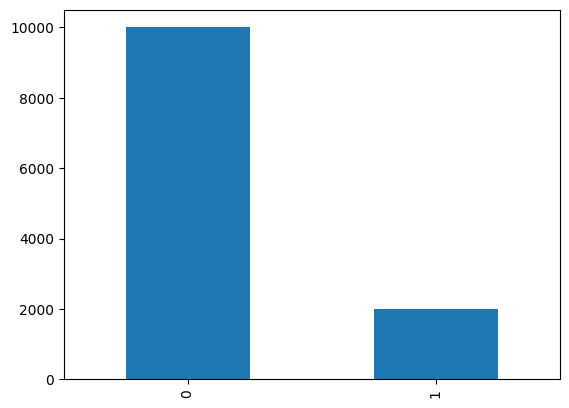

In [ ]:
df.left.value_counts().plot(kind='bar');

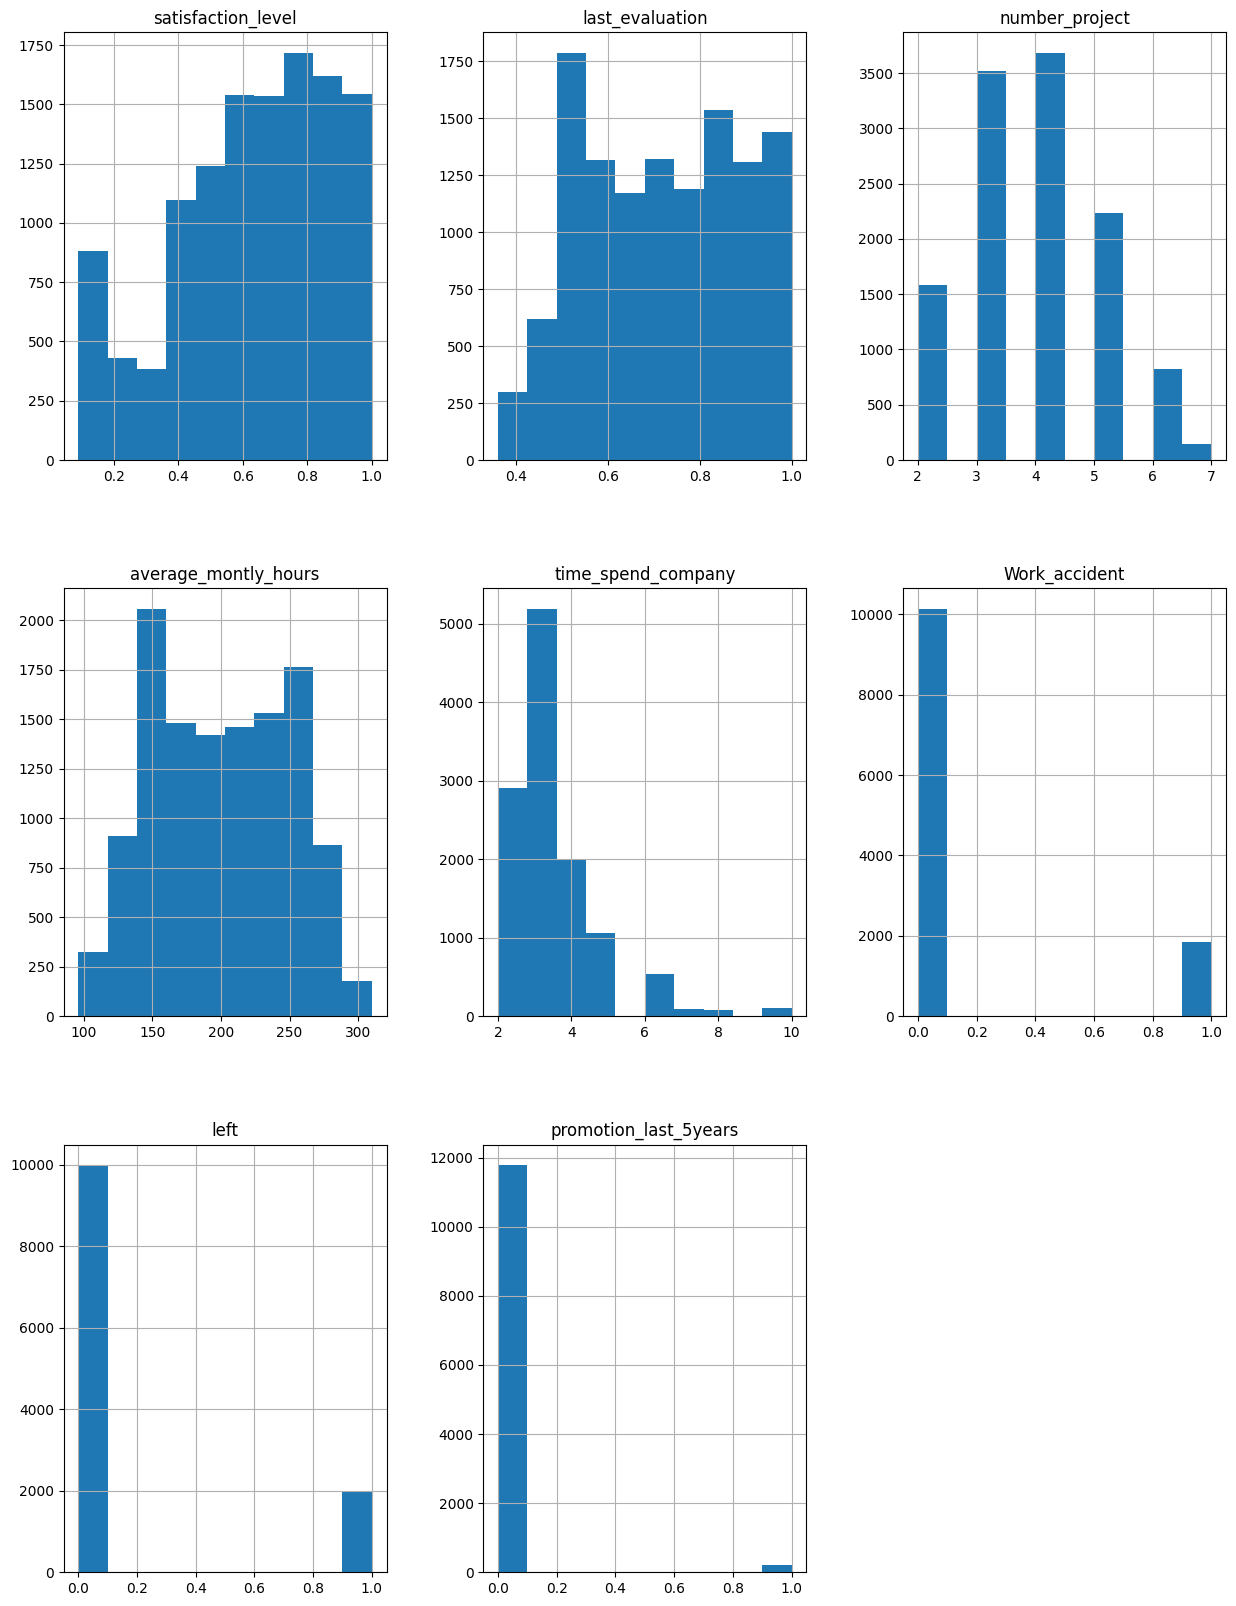

In [ ]:
df[numerical_columns].hist(figsize=(15,20))
plt.show()

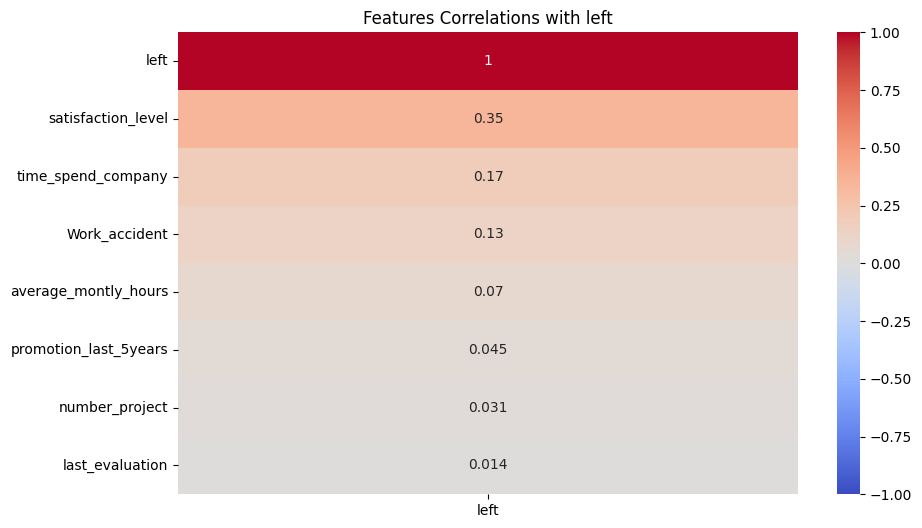

In [ ]:
target_column = 'left'
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

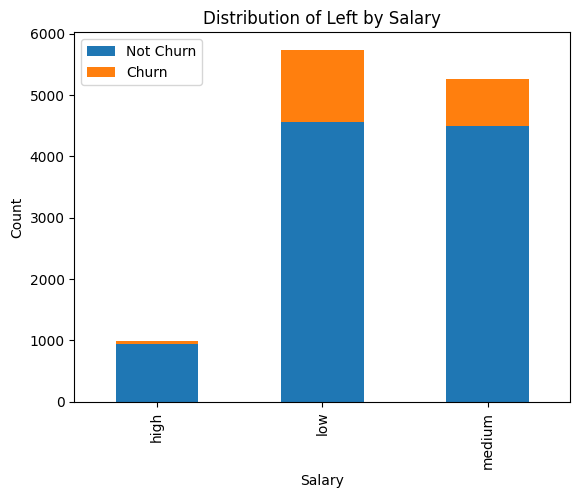

In [165]:
#Lets see salary vs churn status
grouped_data = df.groupby(['salary', 'left']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Left by Salary')
plt.legend( labels=['Not Churn', 'Churn'])
plt.show()

We cannot definitively state that salary directly influences churn status. A more in-depth analysis is required.

#Multicollinearity

In [ ]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

There is no multicollinearity as expected. So continue to outliers.

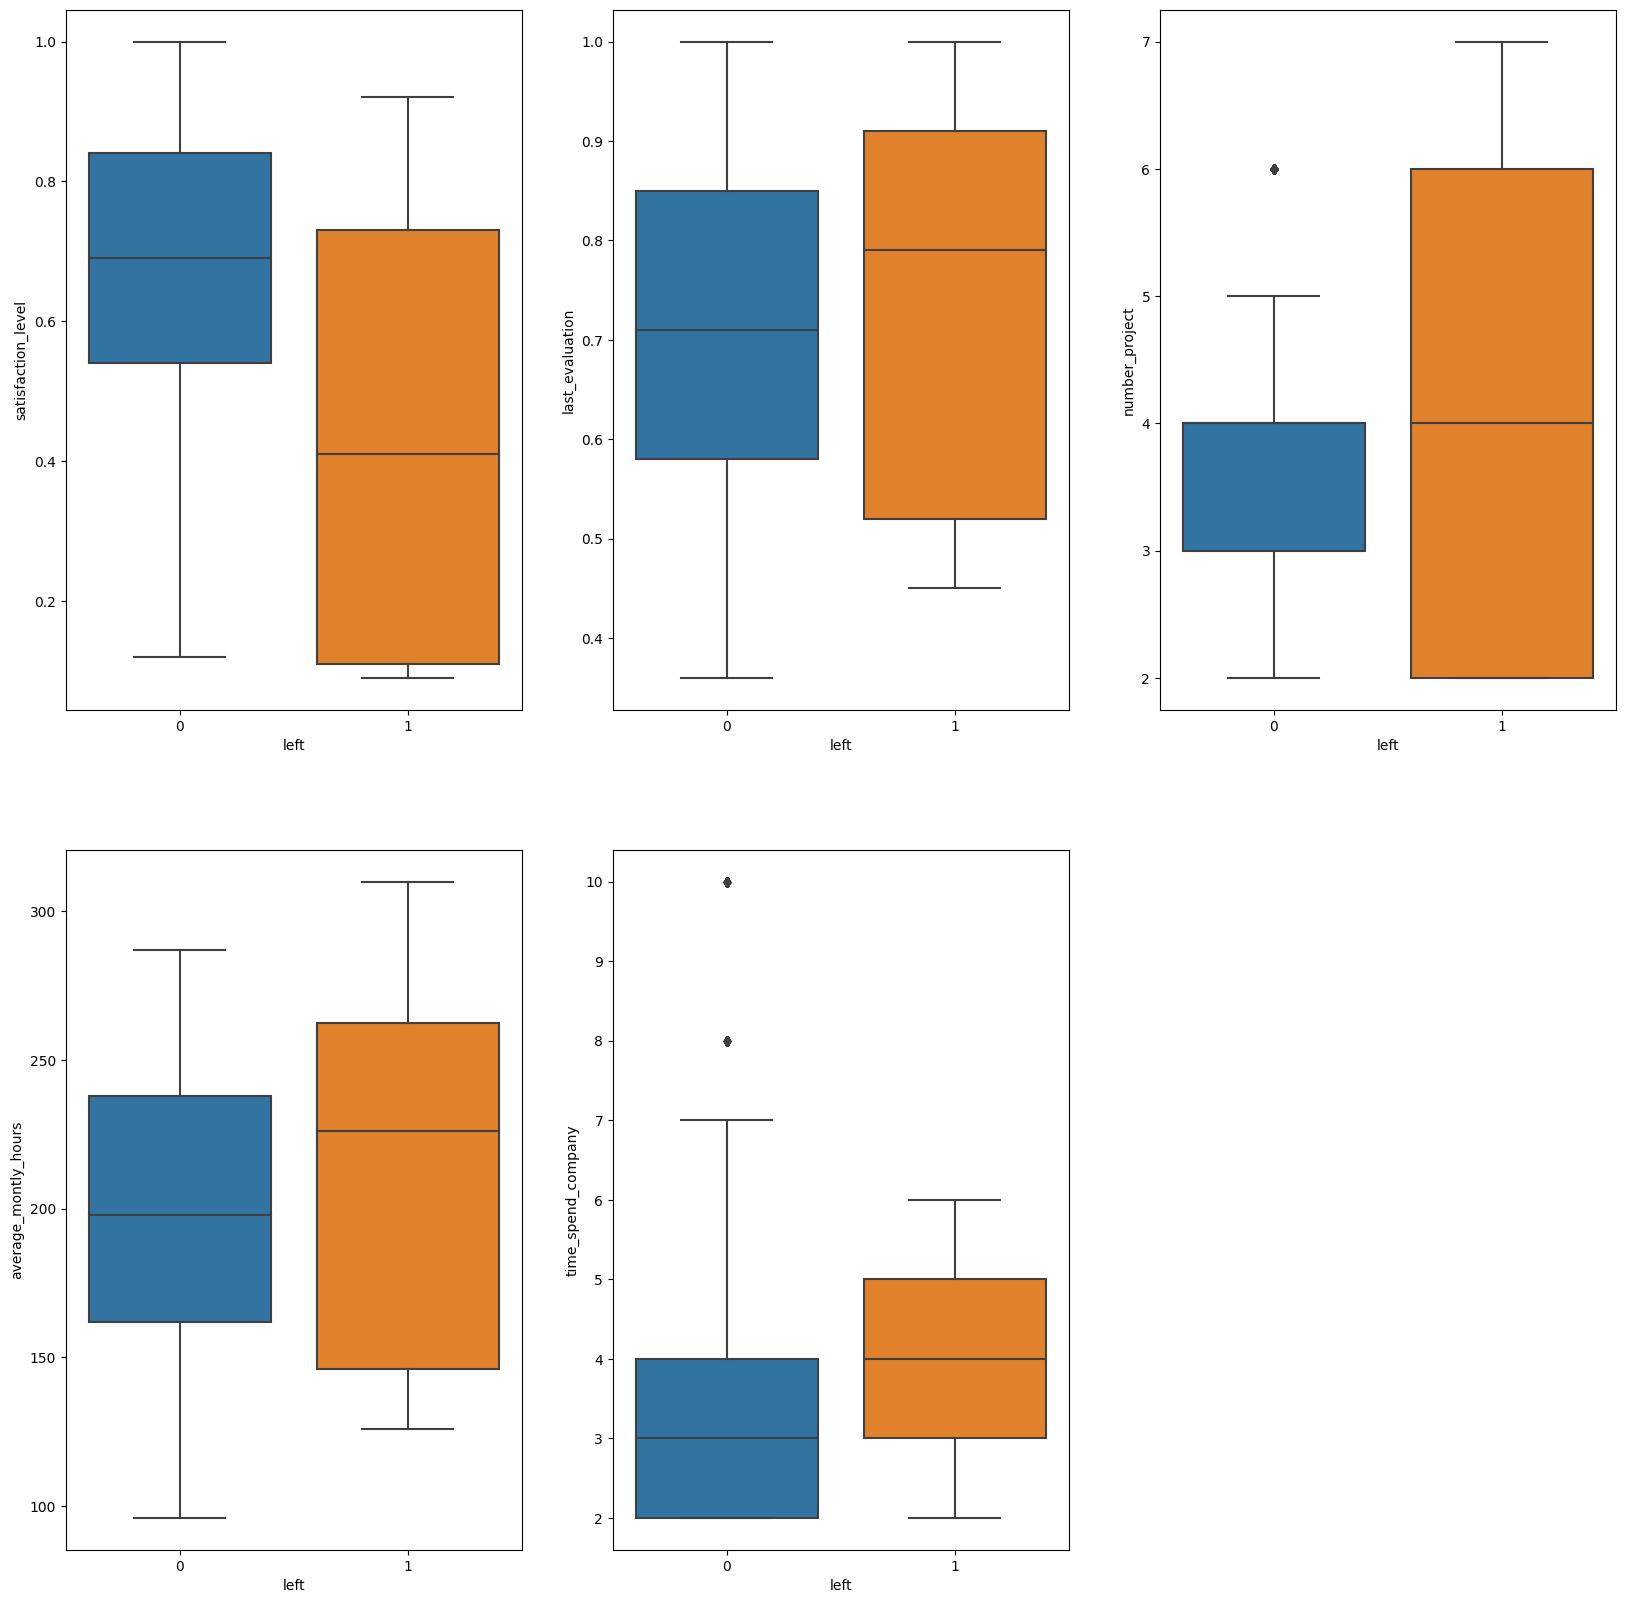

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df[numerical_columns]:
    if feature != "left":
        index += 1
        plt.subplot(2,3,index)
        sns.boxplot(x='left',y=feature,data=df)
plt.show()

 Outliers seem no big deal here. So I kept them in the data.

###  X and Target

In [109]:
X = df.drop(columns=['left'])

In [110]:
y = df['left']

### Column Transformer and Pipeline

In [111]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [123]:
steps = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [125]:
pipeline = Pipeline([
    ('preprocessor',steps),
    ('model',LogisticRegression())

])

In [126]:
from sklearn import set_config

In [127]:
set_config(display='diagram')

In [128]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

### Splitting The Dataset Into The Training Set And Test Set

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [118]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [119]:
y_pred = pipeline.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred)

0.8370154230929554

In [121]:
precision_score(y_test,y_pred)

0.5209580838323353

In [122]:
recall_score(y_test,y_pred)

0.2185929648241206

###  Confusion matrix

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

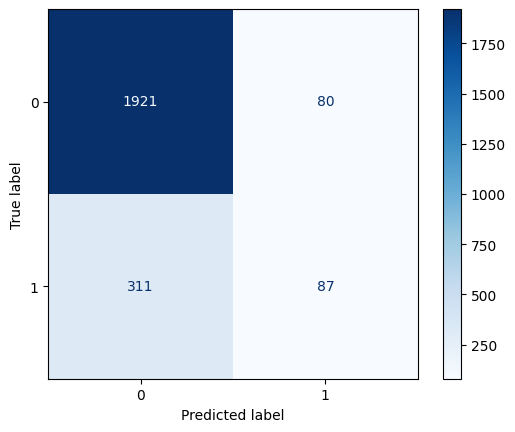

In [137]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.show()


In [138]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [139]:
eval_metric(pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[1921   80]
 [ 311   87]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.52      0.22      0.31       398

    accuracy                           0.84      2399
   macro avg       0.69      0.59      0.61      2399
weighted avg       0.80      0.84      0.81      2399


Train_Set
[[7662  337]
 [1252  341]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7999
           1       0.50      0.21      0.30      1593

    accuracy                           0.83      9592
   macro avg       0.68      0.59      0.60      9592
weighted avg       0.80      0.83      0.81      9592



In [140]:
#Find Best Model
def model_scorer(model_name,model):

    output=[]

    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

In [141]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()

}

In [142]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [143]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9670696123384743, 0.8843373493975903, 0.9221105527638191],
 ['random_forest', 0.9854105877448937, 0.9865951742627346, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [ ]:
# It results Random Forest as best model

In [153]:
step = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [154]:
pipeline = Pipeline([
    ('preprocessor',step),
    ('model',RandomForestClassifier())

])

In [155]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [147]:
y_pred_main = pipeline.predict(X)

In [148]:
accuracy_score(y,y_pred_main)

1.0

In [149]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'


},index=[0])

In [150]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### Save The Model

In [156]:
from joblib import dump, load

In [ ]:
dump(pipeline, 'final_model.joblib')